In [1]:
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sns
import numpy as np

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

![](https://media.giphy.com/media/rM0wxzvwsv5g4/giphy.gif)

### Dataset obtido do Kaggle: Rossmann Store Sales

Esse dataset foi disponibilizado em uma competição do Kaggle com dados de vendas de farmácias do grupo Rossman. O objetivo da competição era fazer a previsão de demanda das lojas com sede na Alemanha. Além dos dados de venda foram fornecidas informações de promoções, feriados e características das lojas.

Link da competição: <https://www.kaggle.com/c/rossmann-store-sales>

### Leitura dos dados

In [2]:
store = pd.read_csv('data/rossmann-store-sales/store.csv')
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [3]:
train = pd.read_csv('data/rossmann-store-sales/train.csv')
train.head()

/home/juliana/anaconda3/envs/tera-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [4]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Visualização com gráfico de linha

Vamos visualizar os dados de venda de uma das lojas

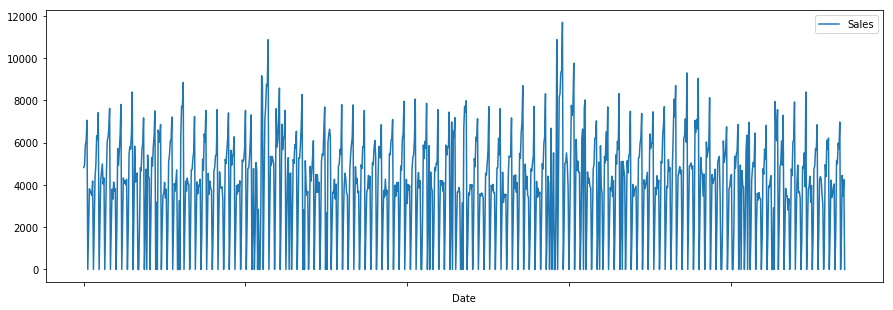

In [5]:
train[train.Store == 5].plot(x='Date', y='Sales', figsize=(15,5))
pl.show()

In [6]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

Para a visuzalização de dados temporais é importante lembrar de ordenar os dados pela data. Se o campo **Date** fosse do tipo `datetime`, para fazer o plot com matplotilib não seria necessário a ordenação da data pois ela já seria feita automaticamente na hora do plot

In [7]:
train['Date'] = pd.to_datetime(train['Date'])

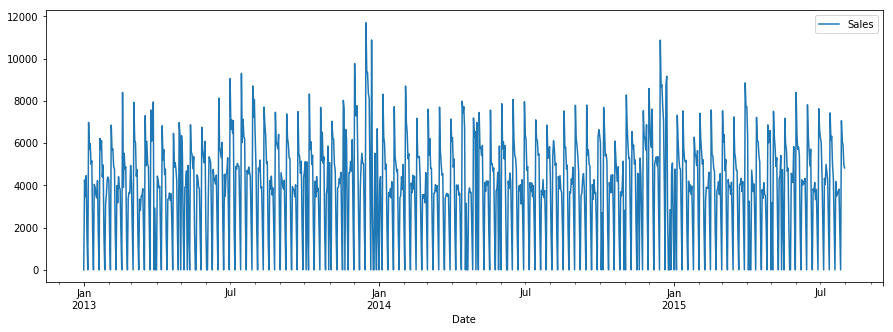

In [8]:
train[train.Store == 5].plot(x='Date', y='Sales', figsize=(15,5))
pl.show()

### Desafio 1:
 
Construa os seguintes [gráficos de linha com plotly](https://plot.ly/ipython-notebooks/cufflinks/#line-charts) da loja com maior venda:
- Gráfico com a soma da venda por semana 
- Gráfico com a soma da venda por mês
- Gráfico com venda diária no eixo da direita e da da variável `Promo` no eixo da esquerda (dica: com o parâmetro secondary_y é possível definir uma variável para ficar no eixo da esquerda)
- Gráfico com a soma das venda por semana no eixo da direita e a soma dos clientes na loja por semana no eixo da esquerda

Obs: Inclua título e descrição dos eixos nos gráficos
Obs2: Ao fazer o resample preencha os valores nulos com 0

Dica: para reamostragem de dados temporais em um dataframe é mais fácil utilizar o método [resample do pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)

### Resposta

In [9]:
sales_store_agg = train.groupby('Store').agg({'Sales': sum}).sort_values(by='Sales', ascending=False)
sales_store_agg.head()

Sales
Store          
262    19516842
817    17057867
562    16927322
1114   16202585
251    14896870

In [10]:
store_top1 = train[train['Store'] == 262]

In [11]:
store_top1_w = store_top1.set_index('Date').resample('W').sum().fillna(0)
title = 'Venda semanal da loja 262'
store_top1_w.iplot(kind='line', y='Sales', title=title, mode='lines+markers', size=6, 
                   color='blue', yTitle='Venda')

In [12]:
store_top1_w = store_top1.set_index('Date').resample('MS').sum().fillna(0)
title = 'Venda mensal da loja 262'
store_top1_w.iplot(kind='line', y='Sales', title=title, mode='lines+markers', size=6, 
                   color='blue', yTitle='Venda')

In [13]:
title = 'Venda x presença de promoção na loja 262'

store_top1.rename(columns={'Sales': 'Venda', 
                           'Promo': 'Promoção'}
                 ).iplot(kind='line', x='Date', y='Venda', secondary_y='Promoção', title=title, 
                         mode='lines', width=[2,0.5], colors=['orange', 'blue'],
                         yTitle='Venda', secondary_y_title='Promoção')

In [14]:
store_top1_w = store_top1.set_index('Date').resample('W').sum().fillna(0)
store_top1_w = store_top1_w.rename(columns={'Sales': 'Venda', 'Customers': 'Clientes'})
title = 'Venda x total de clientes por semana na loja 262'
store_top1_w.iplot(kind='line', y='Venda', secondary_y='Clientes', title=title, 
                   width=[2,1], colors=['orange', 'blue'], 
                   yTitle='Venda', secondary_y_title='Clientes')

Uma forma de verificar se existe relação entre variáveis é por meio do [gráfico de dispersão](https://pt.wikipedia.org/wiki/Gr%C3%A1fico_de_dispers%C3%A3o)

### Desafio 2:

- Construa o gráfico de dispersão usando o método [scatter do pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)
- Construa o gráfico de dispersão usando o método [joinplot do seaborn](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

### Resposta

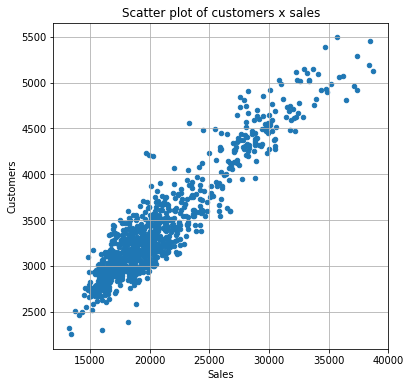

In [15]:
store_top1.plot.scatter(x='Sales', y='Customers', figsize=(6,6))
pl.title('Scatter plot of customers x sales')
pl.grid()

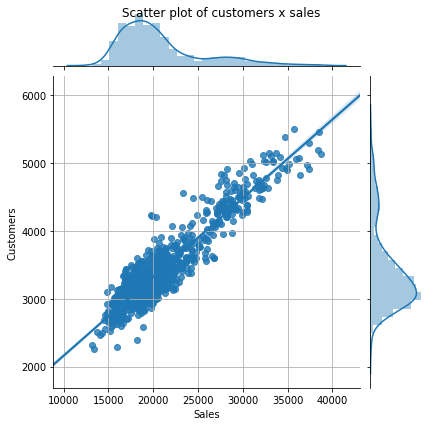

In [16]:
sns.jointplot("Sales", "Customers", data=store_top1, kind="reg", )
pl.suptitle('Scatter plot of customers x sales')
pl.grid()
pl.show()

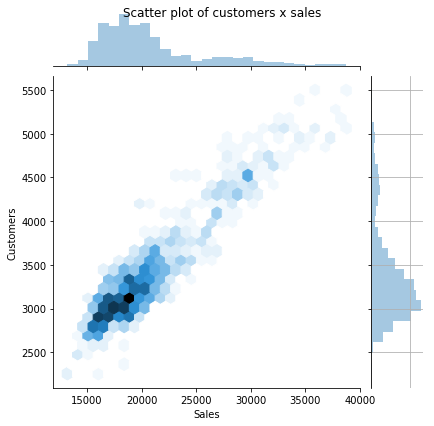

In [23]:
sns.jointplot("Sales", "Customers", data=store_top1, kind="hex")
pl.suptitle('Scatter plot of customers x sales')
pl.grid()
pl.show()

### Grafico com pairplot

O método pairplot do seaborn mostra o gráfico de dispersão entre todas as variáves do dataframe de entrada e mostra o histograma de cada uma das variáveis

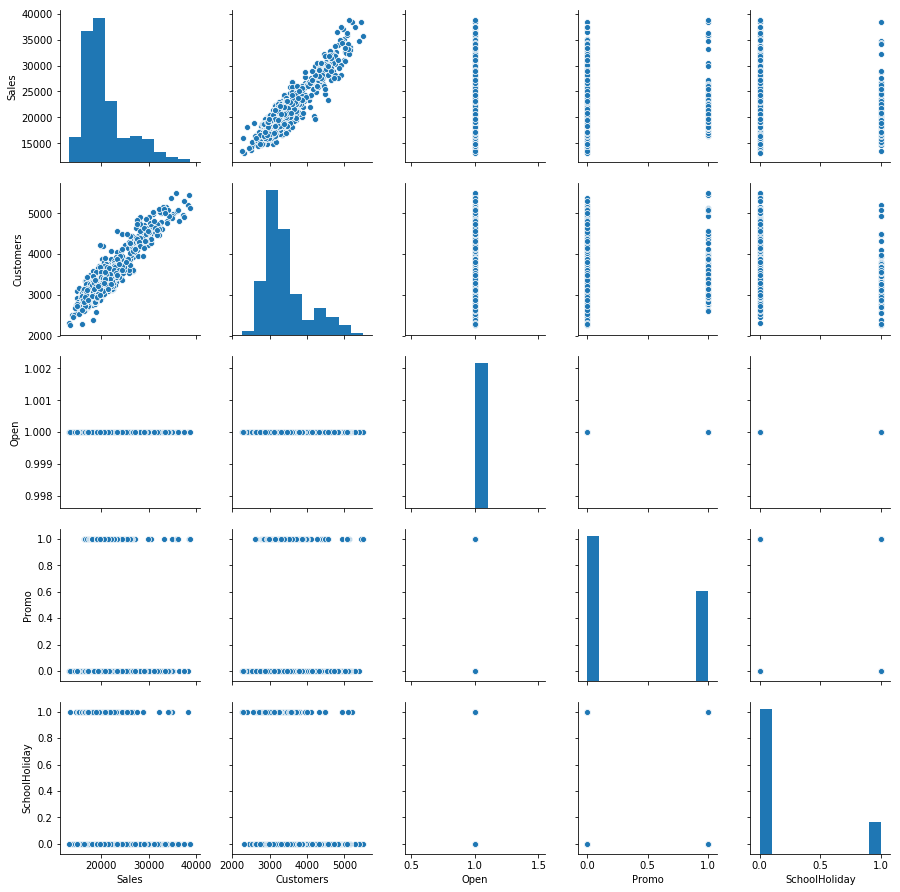

In [18]:
df = store_top1[['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']]
sns.pairplot(df)

O gráfico acima permite ver com alto nível de detalhe a relação entre variáveis. Porém para as variáveis binárias esse gráfico não é ideal. Além de exigir uma análise maior para identificar possíveis relações existentes. Uma alternativa para identificar de forma mais direta relações existente, é o heatmap com a [correlação](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson) entre as variáveis de interesse.

### Desafio 3:
Construa o hetmap para a loja que mais vende mostrando a correlação entre as seguintes variáveis:
- Sales
- Customers
- Open
- Promo
- SchoolHoliday

Obs: Siga os passos desse [tutorial](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

### Resposta

In [19]:
corr = store_top1[['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']].corr()
corr

Sales  Customers  Open     Promo  SchoolHoliday
Sales          1.000000   0.932625   NaN  0.046015      -0.068906
Customers      0.932625   1.000000   NaN -0.097275      -0.089397
Open                NaN        NaN   NaN       NaN            NaN
Promo          0.046015  -0.097275   NaN  1.000000       0.064990
SchoolHoliday -0.068906  -0.089397   NaN  0.064990       1.000000

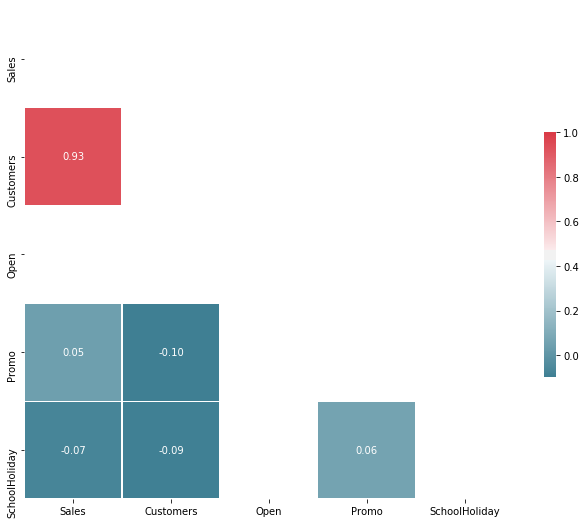

In [20]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
pl.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
pl.show()

In [21]:
corr = train[['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']].corr()
corr

Sales  Customers      Open     Promo  SchoolHoliday
Sales          1.000000   0.894711  0.678472  0.452345       0.085124
Customers      0.894711   1.000000  0.616768  0.316169       0.071568
Open           0.678472   0.616768  1.000000  0.295042       0.086171
Promo          0.452345   0.316169  0.295042  1.000000       0.067483
SchoolHoliday  0.085124   0.071568  0.086171  0.067483       1.000000

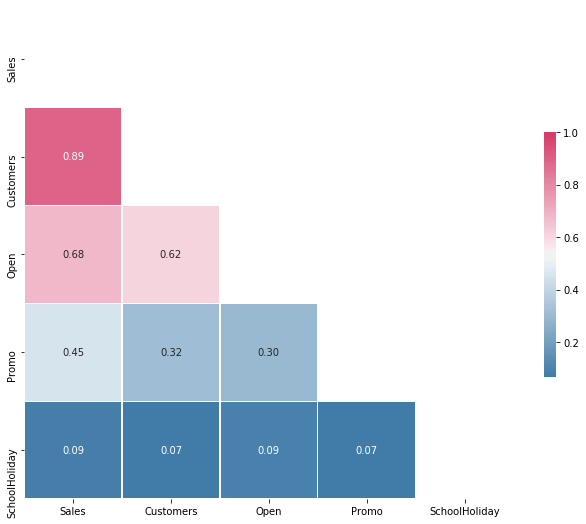

In [22]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = pl.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 0, n=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
pl.show()